In [1]:
from pygalfitm.VOs import splus

from pygalfitm import PyGalfitm
import splusdata

conn = splusdata.connect("gustavo", "asdflkjh")

You have access to internal data


In [14]:
pygalgitm_object = splus.get_splus_class(
    "test", 51.30076502619376, -32.90247622337992, 200, 
    'data/', 
    'outputs/', 
    conn, 
    bands=["z", "i", "r", "g", "u"])

finished
finished
finished
finished
finished


In [15]:
pygalgitm_object.active_components

['sersic']

In [17]:
pygalgitm_object.print_base()

A) data/test_z.fits,data/test_i.fits,data/test_r.fits,data/test_g.fits,data/test_u.fits # Input data image (FITS file)
A1) z,i,r,g,u                        # Nick names (band labels) 
A2) 8936.64,7670.59,6251.83,4758.49,3533.29 # Effective wavelenghts
B) outputs/testss.fits              # Output data image block
C) none                             # Sigma image name (made from data if blank or 'none')
D) data/psf_test_z.fits,data/psf_test_i.fits,data/psf_test_r.fits,data/psf_test_g.fits,data/psf_test_u.fits # Input PSF image and (optional) diffusion kernel
E) 1                                # PSF fine sampling factor relative to data 
F) none                             # Bad pixel mask (FITS image or ASCII coord list)
G) none                             # File with parameter constraints (ASCII file) 
H) 1   200  1   200                 # Image region to fit (xmin xmax ymin ymax)
I) 200 200                          # Size of the convolution box (x y)
J) 22.766,23.344,23.535,23.49,20.8

In [5]:
pygalgitm_object.write_component("sersic", feedme_path="outputs/galfit.feedme")

In [18]:
pygalgitm_object.write_feedme()

In [8]:
_ = pygalgitm_object.run()

['sersic']

In [3]:
import matplotlib.pyplot as plt

from pygalfitm.read import read_output_to_class

In [6]:
obj = PyGalfitm()

In [9]:
obj.activate_components(["sersic"])

In [13]:
obj.print_component("sersic")

1) 200.0,200.0,200.0                   1     band       # Position x [pixel]
2) 20                                  20    20         # Position y [pixel]
3) 0,0,0                               3     band       # Integrated magnitude
4) 0,0,0                               2     band       # R_e (effective radius) [pix]
5) 4                                   2     band       # Sersic index n (de Vaucouleurs n=4)
9) 0,0,0                               1     band       # Axis ratio (b/a)
10) 0,0,0                               1     band       # Position angle (PA) [deg: Up=0, Left=90]
Z) 0                                                    # Skip this model in output image? (yes=1, no=0)


In [12]:
obj.set_component("sersic", {
    "2": (20, 20, 20)
})

In [20]:
pygalfitClass.print_component("sersic")

1) 102.413,102.413,102.413,102.413,102.413,102.413,102.413,102.413 1,0,0,0,0,0,0,0 band       #      Position x
2) 99.883,99.883,99.883,99.883,99.883,99.883,99.883,99.883 1,0,0,0,0,0,0,0 band       #      Position y
3) 14.280,14.401,14.695,15.186,15.728,14.299,14.604,15.612 1,1,1,0,0,0,0,0 band       #  Integrated magnitude
4) 82.855,84.856,87.097,89.457,91.393,83.375,86.525,91.014 1,1,0,0,0,0,0,0 band       #  R_e (effective radius)   [pix]
5) 3.445,3.362,3.268,3.170,3.089,3.424,3.292,3.105 1,1,0,0,0,0,0,0 band       #  Sersic index n (de Vaucouleurs n=4)
6) 0,0,0,0,0,0,0,0                     0,0,0,0,0,0,0,0 band       #     -----
7) 0,0,0,0,0,0,0,0                     0,0,0,0,0,0,0,0 band       #     -----
8) 0,0,0,0,0,0,0,0                     0,0,0,0,0,0,0,0 band       #     -----
9) 1.000,0.993,0.974,0.984,0.735,0.970,0.954,0.693 1,0,0,0,0,0,0,0 band       #  Axis ratio (b/a)
10) 84.425,80.773,80.440,82.457,-23.021,-89.416,83.135,-13.037 1,0,0,0,0,0,0,0 band       #  Position ang

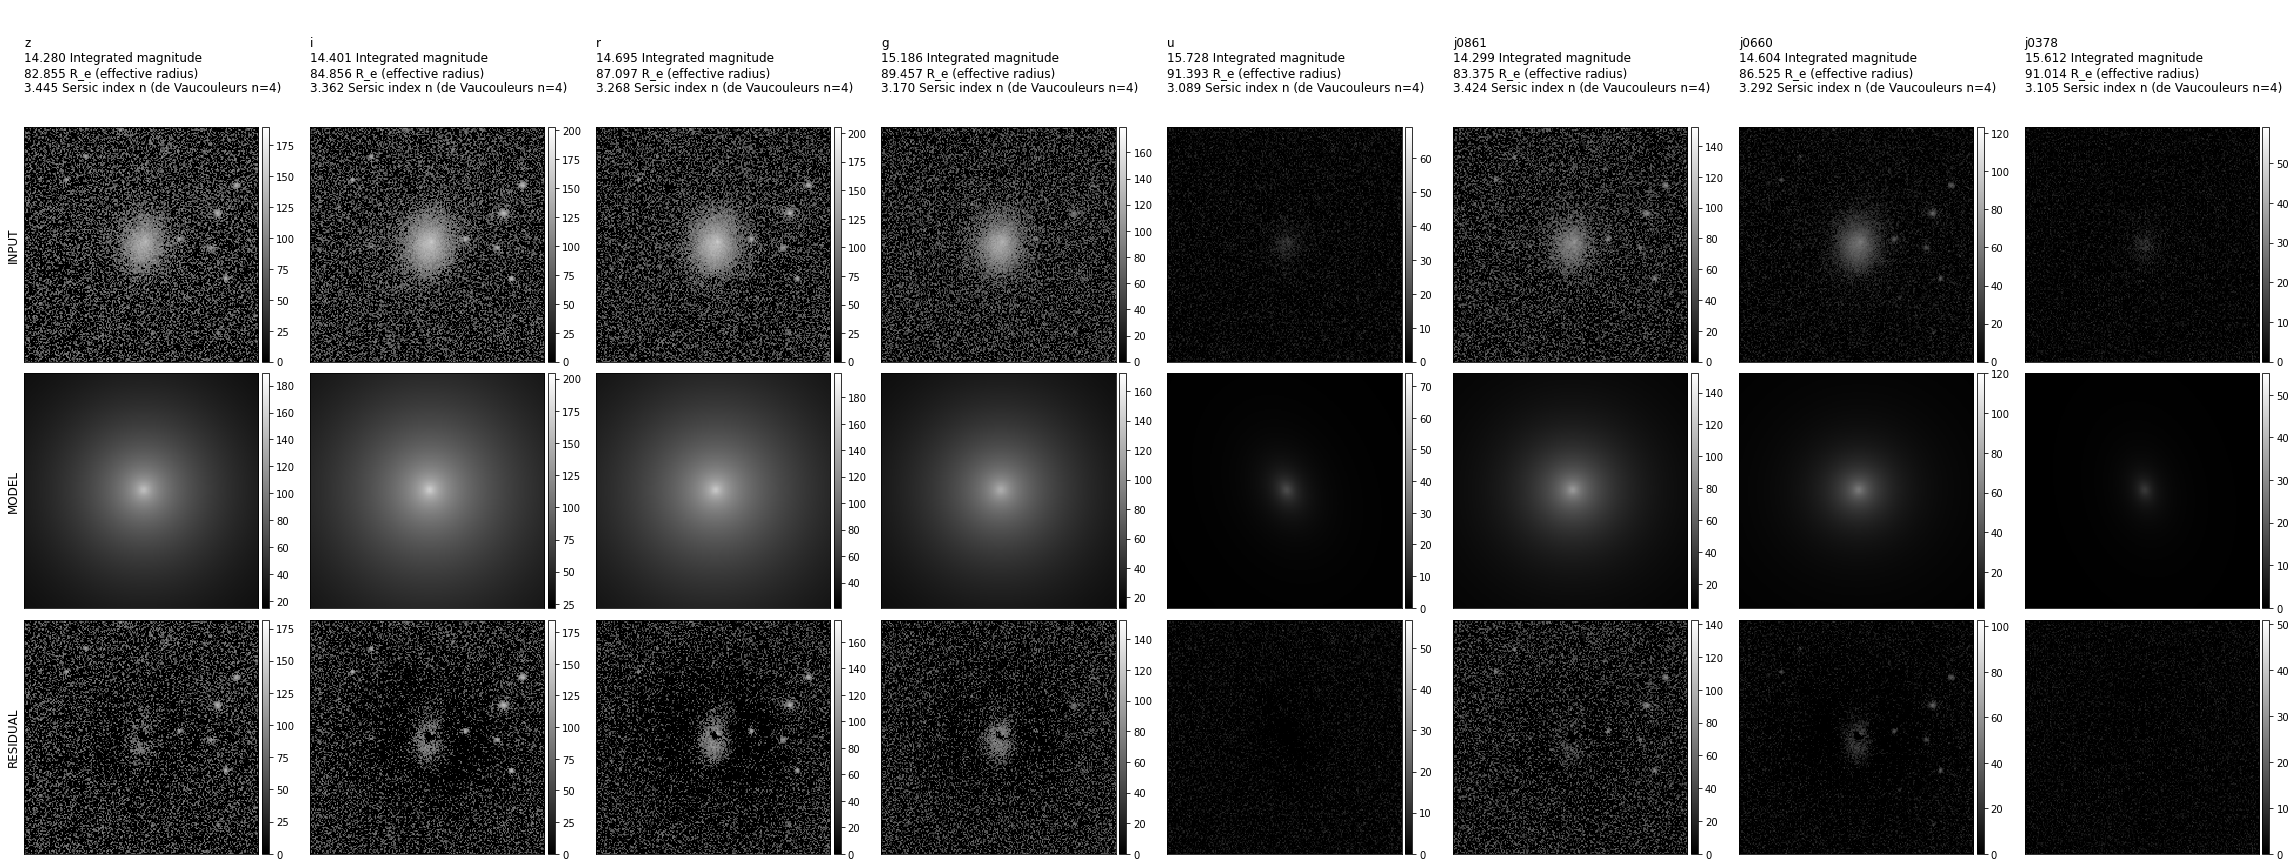

In [21]:
pygalfitClass = read_output_to_class("outputs/testss.galfit.01.band")
pygalfitClass.gen_plot( "sersic", return_plot = False, plot_parameters=[3, 4, 5], colorbar=True)

In [194]:
# Create a code using astropy that takes the nearest object, using ra and dec in degrees, from a table with multiple objects

In [ ]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import pandas as pd

def find_nearest_object(table, ra, dec):
    """
    Function to find the nearest object in a table based on Right Ascension and Declination.

    Parameters:
    table : pandas DataFrame
        DataFrame containing the table with objects.
    ra : float
        Right Ascension of the target position in degrees.
    dec : float
        Declination of the target position in degrees.

    Returns:
    nearest_object : pandas Series
        Series representing the nearest object in the table.
    """
    target_coord = SkyCoord(ra=ra*u.degree, dec=dec*u.degree)
    table_coords = SkyCoord(ra=table['ra']*u.degree, dec=table['dec']*u.degree)
    idx, sep, _ = target_coord.match_to_catalog_sky(table_coords)
    nearest_object = table.iloc[idx]
    return nearest_object

# Example usage:
table = pd.read_csv('path_to_your_table.csv')
ra = 125.6
dec = 32.1
nearest_object = find_nearest_object(table, ra, dec)
print(nearest_object)